# Introduction to Convolutional Neural Networks and computer vision with tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the code on github: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-01-06 07:49:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   203MB/s    in 0.5s    

2022-01-06 07:49:47 (203 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning prject is becoming one with the data. 
And for a computer vision project... this is usually means of visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walk through pizz_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories in {dirpath} with {len(filenames)} number of files')

There are 2 directories in pizza_steak with 0 number of files
There are 2 directories in pizza_steak/test with 0 number of files
There are 0 directories in pizza_steak/test/pizza with 250 number of files
There are 0 directories in pizza_steak/test/steak with 250 number of files
There are 2 directories in pizza_steak/train with 0 number of files
There are 0 directories in pizza_steak/train/pizza with 750 number of files
There are 0 directories in pizza_steak/train/steak with 750 number of files


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visiualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names for the subdirectory train
#class_names = np.array([item.name for item in data_dir.glob('*')])

print(class_names)
print(type(class_names))

['pizza' 'steak']
<class 'numpy.ndarray'>


In [ ]:
# Own testing
train_steak = np.array([item for item in data_dir.glob('steak/*')])
train_pizza = np.array([item for item in data_dir.glob('pizza/*')])
print(len(train_steak))
print(len(train_pizza), f'type: {type(train_pizza)}')

750
750 type: <class 'numpy.ndarray'>


In [ ]:
# Own testing
pizza_train = list(data_dir.glob('pizza/*'))
first_pizza = pizza_train[0]
first_pizza

PosixPath('pizza_steak/train/pizza/1638227.jpg')

In [ ]:
# Let's visalize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class


  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  print(random_image)
  imgplot = plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

['3577732.jpg']
Image shape: (512, 512, 3)


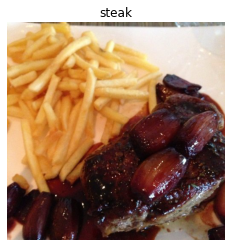

In [ ]:
# View a random image from our directory

target_dir = '/content/pizza_steak/train/'

img = view_random_image(target_dir=target_dir,
                  target_class='steak')

In [ ]:
target_class = 'pizza'
target_folder = target_dir + target_class

image_list = []

image_folder = os.listdir(target_folder)

for i in image_folder:
  img = mpimg.imread(target_folder + '/' + i)
  image_list.append(img)

print(np.array(image_list).shape)


(750,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [ ]:
image_list = np.array(image_list)
for i in range(10):
  print(image_list[i].shape)



(512, 512, 3)
(341, 512, 3)
(434, 512, 3)
(341, 512, 3)
(512, 512, 3)
(512, 512, 3)
(306, 512, 3)
(306, 512, 3)
(384, 512, 3)
(512, 512, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


# As seen the pixel values are different, I will watch the video to see what is done. But it seems like it is done in the convolutional part of the training (pooling)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Prprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation='relu',
                                                            input_shape=(224, 224, 3)),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 249ms/step - loss: 0.5888 - accuracy: 0.6780 - val_loss: 0.3960 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4228 - accuracy: 0.8060 - val_loss: 0.3521 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3854 - accuracy: 0.8313 - val_loss: 0.3088 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3751 - accuracy: 0.8300 - val_loss: 0.3258 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3223 - accuracy: 0.8560 - val_loss: 0.3003 - val_accuracy: 0.8720


Using GPU went a lot faster. Remember to try and enable GPU if it is too slow

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from the tensorflow playground


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)


test_dir = 'pizza_steak/test'
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# Create a model to replicate the TenforFlow playground

model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                                       tf.keras.layers.Dense(4, activation='relu'),
                                       tf.keras.layers.Dense(4, activation='relu'),
                                       tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 206ms/step - loss: 1.9029 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Picking apart model_1

tf.random.set_seed(42)

# Make model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10, 
                                                      kernel_size=3, 
                                                      activation='relu',
                                                      input_shape=(224, 224, 3)),
                               #tf.keras.layers.Conv2D(10, 3, activation='relu'),
                               #tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                               #tf.keras.layers.Conv2D(10, 3, activation='relu'),
                               #tf.keras.layers.Conv2D(10, 3, activation='relu'),
                               #tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               #tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 11s 223ms/step - loss: 0.7612 - accuracy: 0.6480 - val_loss: 0.6102 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5954 - accuracy: 0.7420 - val_loss: 0.5720 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5575 - accuracy: 0.7947 - val_loss: 0.5268 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.5153 - accuracy: 0.8360 - val_loss: 0.5104 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4749 - accuracy: 0.8587 - val_loss: 0.4934 - val_accuracy: 0.8620


In [ ]:
# Let's write more code and experiment

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=2,
                                                      activation='relu',
                                                      input_shape=(224, 224, 3)),
                               tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 0.8574 - accuracy: 0.6580 - val_loss: 0.5577 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4161 - accuracy: 0.8180 - val_loss: 0.3379 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3416 - accuracy: 0.8460 - val_loss: 0.4106 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.2800 - accuracy: 0.8893 - val_loss: 0.3213 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.2231 - accuracy: 0.9247 - val_loss: 0.3141 - val_accuracy: 0.8660


In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 223, 223, 10)      130       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123210)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 123211    
                                                                 
Total params: 123,341
Trainable params: 123,341
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more paramters than our CNN model the model_2 performs horrible (600k vs 30k)

*Note:* You can think of trainable parameters as **patterns a model can learn from data.** Intuitively you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. We here have a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional nerual network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and imrpove the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data

['330182.jpg']
Image shape: (384, 512, 3)
['3207504.jpg']
Image shape: (512, 512, 3)


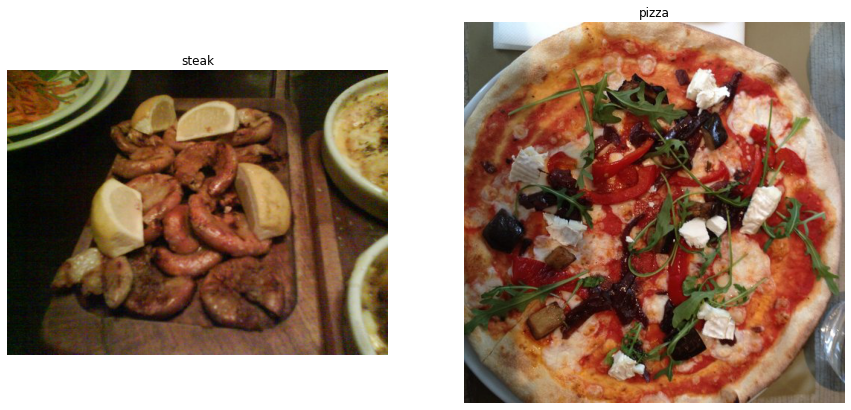

In [ ]:
# Visualize the data
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_image = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define our directory datasets path
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because of 32 is good for your health

In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # get the "next" batch of images/labels in our folder
len(images), len(labels)
  

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.08627451, 0.04705883, 0.0509804 ],
          [0.08235294, 0.02352941, 0.03529412],
          [0.1137255 , 0.03137255, 0.0509804 ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.08235294, 0.04313726, 0.04705883],
          [0.08235294, 0.02352941, 0.03529412],
          [0.10980393, 0.02745098, 0.04705883],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.09019608, 0.0509804 , 0.05490196],
          [0.09411766, 0.03137255, 0.04313726],
          [0.10588236, 0.01568628, 0.03921569],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.49411768, 0.4156863 , 0.41960788],
          [0.52156

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiement and the nas you keep experimenting, you try to bneat the baseline

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_5 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding='valid',
                             activation='relu',
                             input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')
                      
])


# Compile our model
model_5.compile(loss='binary_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])


# train the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 251ms/step - loss: 0.6655 - accuracy: 0.6353 - val_loss: 0.4808 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4387 - accuracy: 0.8020 - val_loss: 0.3791 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.2702 - accuracy: 0.8960 - val_loss: 0.3779 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1117 - accuracy: 0.9713 - val_loss: 0.4487 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 0.4590 - val_accuracy: 0.8160


In [ ]:
# Get a summary of our model
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


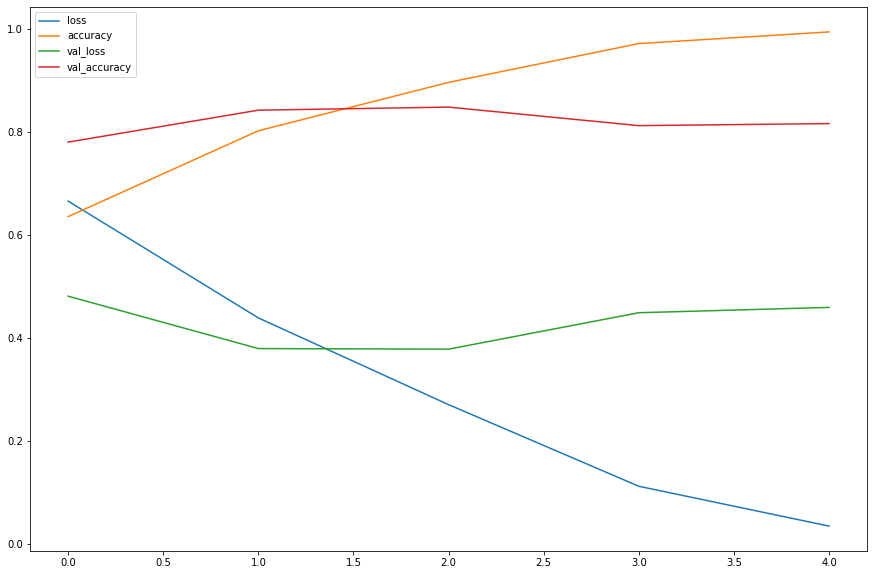

In [ ]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(15, 10))

In [ ]:
# Plot them seperately
import matplotlib.pyplot as plt
def plot_loss_curves(history):

  """
  Returns sperated loss curves for training and val scores
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  
  plt.figure(figsize=(10, 7))
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend();
  
  plt.figure(figsize=(10, 7))
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend();


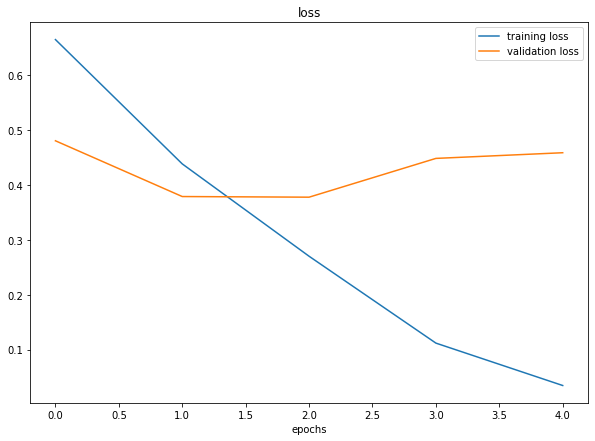

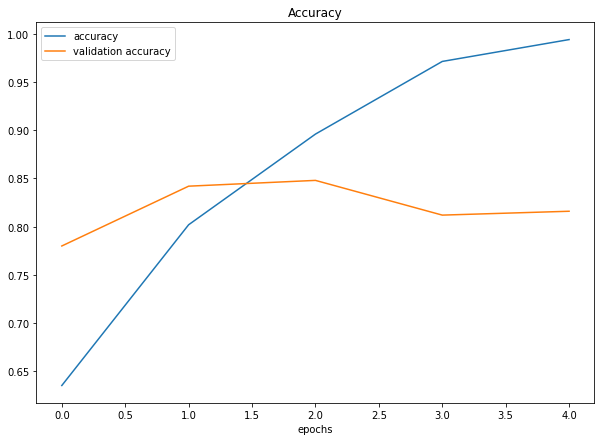

In [ ]:
plot_loss_curves(history_5)

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

### 4. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data....

In [ ]:
# Create a new model (this will be our new baseline)

model_6 = Sequential([
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6329 - accuracy: 0.6480 - val_loss: 0.5076 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4858 - accuracy: 0.7753 - val_loss: 0.4575 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4551 - accuracy: 0.7900 - val_loss: 0.3560 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3895 - accuracy: 0.8393 - val_loss: 0.4024 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3788 - accuracy: 0.8360 - val_loss: 0.3294 - val_accuracy: 0.8760


In [ ]:
# Get summary and pay attention to shapes
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 10)   0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)  

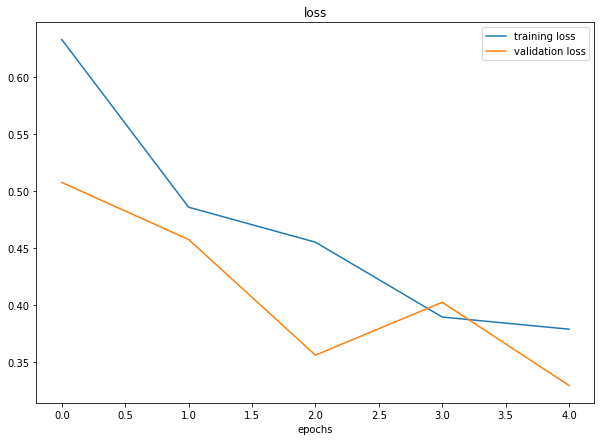

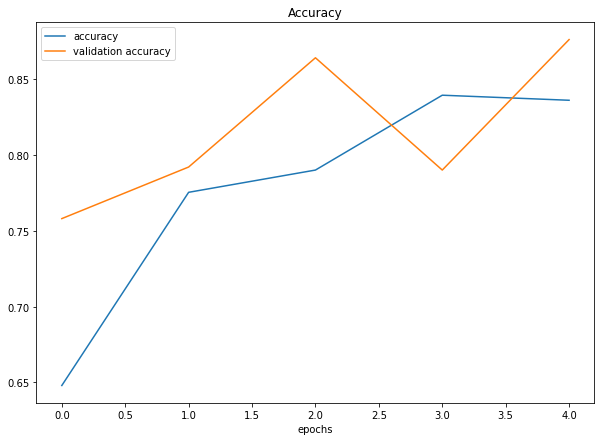

In [ ]:
plot_loss_curves(history_6)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True) 

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn alloving our models to learn more genralizable (hopefully) patterns. Alterning might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visalize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=False)
# Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               shuffle=False)
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='binary',
                                             )

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the trainiong data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally let's viosualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next()

showing image number: 20


(-0.5, 223.5, 223.5, -0.5)

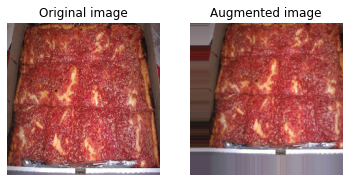

In [ ]:
# Show original image and augmented image
import random

random_number = random.randint(0, 32) 
print(f'showing image number: {random_number}')
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [ ]:
len(augmented_images), len(labels), labels

(32,
 32,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [ ]:
# I'll try myself with the augmented data:
tf.random.set_seed(42)

# Make the model
model_7 = Sequential([
                      Conv2D(10, 3, activation='relu'), #input_shape=(224, 224, 3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')

])


# Compile the model
model_7.compile(loss='binary_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])

# Train the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 539ms/step - loss: 0.7028 - accuracy: 0.4253 - val_loss: 0.6898 - val_accuracy: 0.5580
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.6952 - accuracy: 0.5180 - val_loss: 0.6899 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6893 - accuracy: 0.5360 - val_loss: 0.6638 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6758 - accuracy: 0.5847 - val_loss: 0.5973 - val_accuracy: 0.6680
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6533 - accuracy: 0.6133 - val_loss: 0.6306 - val_accuracy: 0.6040


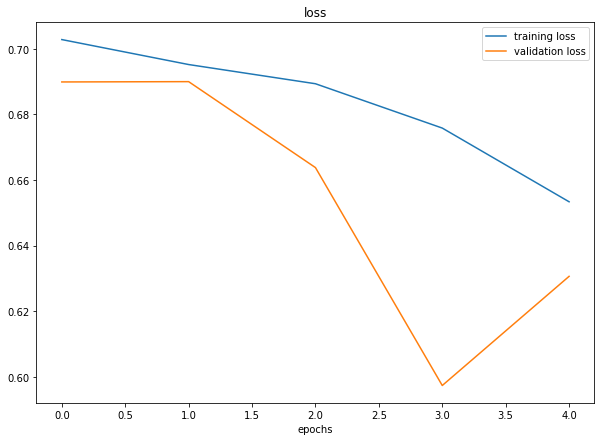

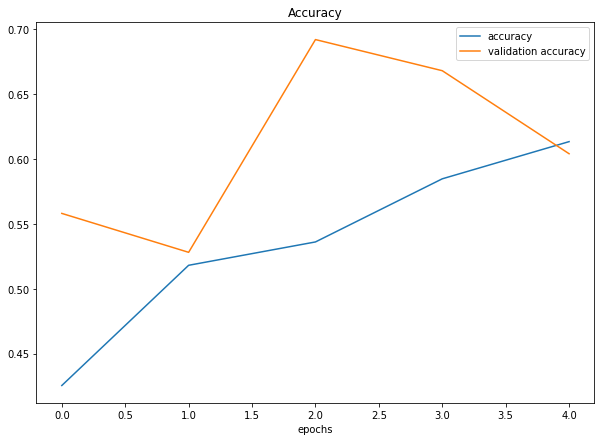

In [ ]:
plot_loss_curves(history_7)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   class_mode='binary',
                                                                   shuffle=True,
                                                                   )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='binary',
                                             shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build another fucking model because why not

model_8 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Train the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 539ms/step - loss: 0.6663 - accuracy: 0.5960 - val_loss: 0.5538 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6089 - accuracy: 0.6607 - val_loss: 0.4410 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5464 - accuracy: 0.7247 - val_loss: 0.4138 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5363 - accuracy: 0.7313 - val_loss: 0.4085 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 25s 524ms/step - loss: 0.4966 - accuracy: 0.7473 - val_loss: 0.3779 - val_accuracy: 0.8200


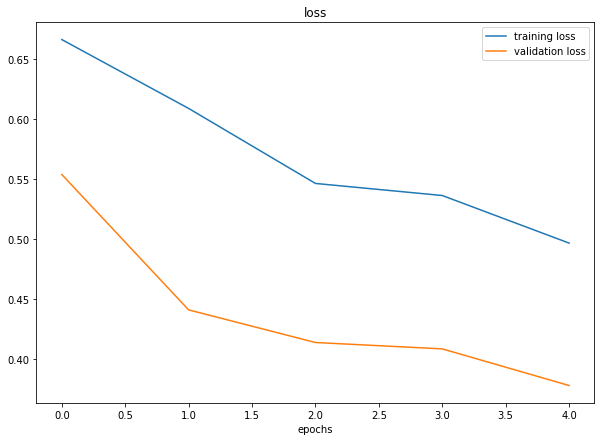

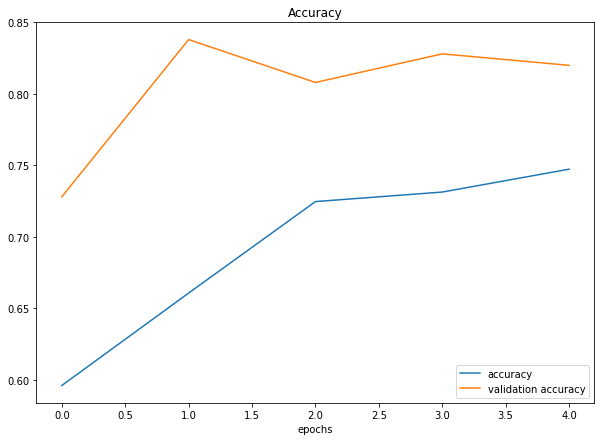

In [ ]:
plot_loss_curves(history_8)

### 5. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add move 'Conv2D'/ 'MaxPool2D' layers)
* Increase the number of filters in each convolutional layer
* Train for longer
* Find ideal learning rate (this is just unnecessary because the deafault one is pretty good)
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how well it performes on augmented shuffled data

In [ ]:
# We will do the exercise from start
# Download the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-01-08 15:15:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   164MB/s    in 0.6s    

2022-01-08 15:15:52 (164 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.3,
                                             horizontal_flip=True,
                                             zoom_range=0.2)
test_data = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Create the iterator or whatever it is called. Neat little thing
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=True)

test_data = test_data.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          class_mode='binary',
                                          shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

tf.random.set_seed(42)

# Build the model
model_9 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])


# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model
history_9 = model_9.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 36s 576ms/step - loss: 0.6236 - accuracy: 0.6373 - val_loss: 0.4609 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 28s 585ms/step - loss: 0.5036 - accuracy: 0.7527 - val_loss: 0.3753 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 28s 594ms/step - loss: 0.4857 - accuracy: 0.7747 - val_loss: 0.3500 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 28s 593ms/step - loss: 0.4735 - accuracy: 0.7727 - val_loss: 0.3410 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 28s 595ms/step - loss: 0.4661 - accuracy: 0.7833 - val_loss: 0.3127 - val_accuracy: 0.8560


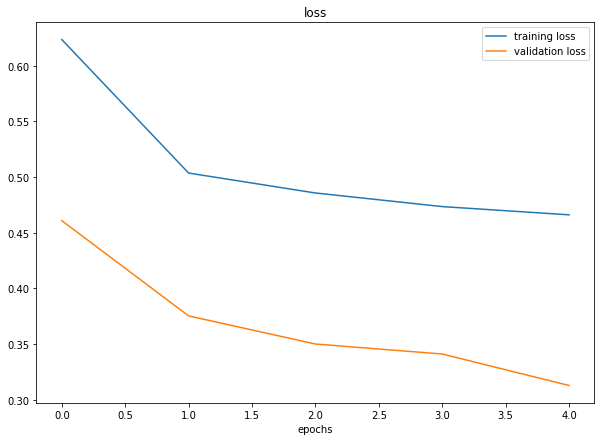

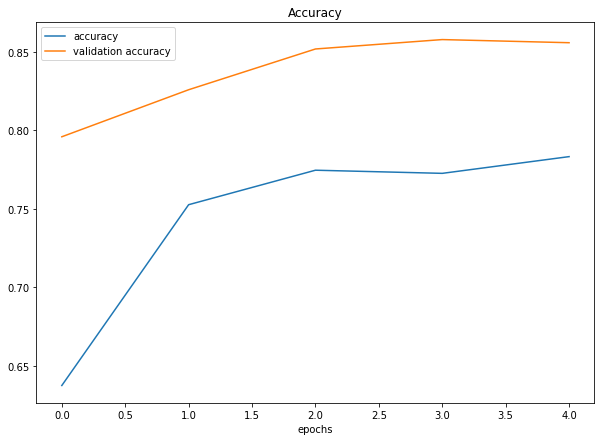

In [ ]:
plot_loss_curves(history_9)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
# Build another model to improve the previous one
tf.random.set_seed(42)
model_10 = Sequential([
                       Conv2D(32, 3, input_shape=(224, 224, 3), activation='relu'),
                       Conv2D(32, 3, activation='relu'),
                       MaxPool2D(),
                       Conv2D(32, 3, activation='relu'),
                       Conv2D(32, 3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')
])


# Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# Train the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 42s 631ms/step - loss: 0.6251 - accuracy: 0.6407 - val_loss: 0.4750 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 28s 592ms/step - loss: 0.5149 - accuracy: 0.7453 - val_loss: 0.4134 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 28s 591ms/step - loss: 0.4978 - accuracy: 0.7640 - val_loss: 0.3689 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 28s 591ms/step - loss: 0.4755 - accuracy: 0.7853 - val_loss: 0.4111 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 28s 592ms/step - loss: 0.4700 - accuracy: 0.7913 - val_loss: 0.3400 - val_accuracy: 0.8560


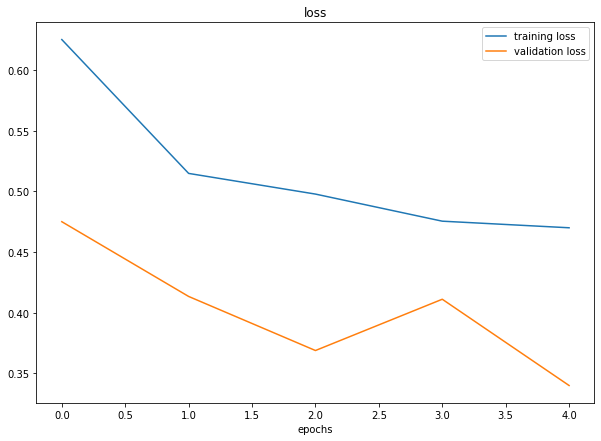

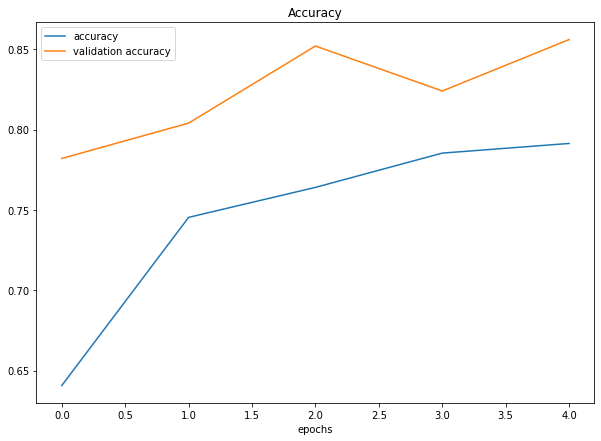

In [ ]:
plot_loss_curves(history_10)

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-01-08 15:19:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-01-08 15:19:37 (30.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

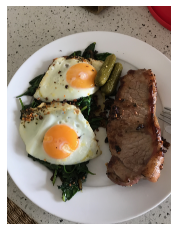

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import a n image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all the values between 0 and 1)
  img = img/255.
  return img

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak.shape

TensorShape([224, 224, 3])

In [ ]:
pred = model_10.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently outputs a pridcion probability, wouldn't it be nice if we could visualize the image as well as the model's prediction? (No actually. Too much visualization)

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the calss names 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

['525041.jpg']
Image shape: (512, 512, 3)


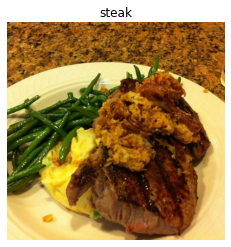

In [ ]:
import os
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class


  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  print(random_image)
  imgplot = plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img


target_dir = '/content/pizza_steak/train/'

img = view_random_image(target_dir=target_dir,
                  target_class='steak')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  print('pizza_steak/train/' + pred_class)
  #show_img = mpimg.imread('pizza_steak/train/' + pred_class + '/')
  show_img = view_random_image('pizza_steak/train/', target_class=pred_class)
  print(f'The predicted class for this image was: {pred_class}')
  plt.title(pred_class)
  plt.imshow(show_img)
  plt.axis('off')

pizza_steak/train/steak
['3671877.jpg']
Image shape: (512, 512, 3)
The predicted class for this image was: steak


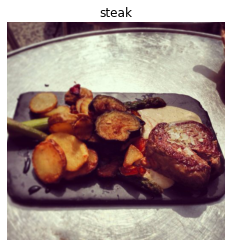

In [ ]:
pred_and_plot(model_10, '03-steak.jpeg')

In [ ]:
# SHittier version of pred_and_plot:

def shitty_pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.title(f'Prediction: {pred_class}')
  plt.imshow(img)
  plt.axis('off')

--2022-01-08 15:58:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-01-08 15:58:39 (43.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

pizza_steak/train/pizza
['218711.jpg']
Image shape: (512, 382, 3)
The predicted class for this image was: pizza


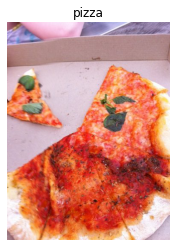

In [ ]:
# Let's download a pizza picture
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_10, '03-pizza-dad.jpeg')

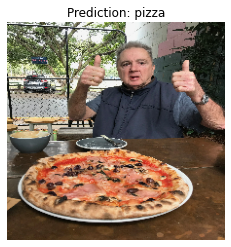

In [ ]:
# The boring one with the shittier function
shitty_pred_and_plot(model_10, '03-pizza-dad.jpeg')

# Multiclass image classification

We are going to do 10 classes now

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline model)/reduce overfitting
7. Repeat until satisfied

## 1. Become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')

--2022-01-10 13:53:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.152.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   200MB/s    in 2.5s    

2022-01-10 13:53:08 (200 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
zip_ref.extractall()
zip_ref.close()
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 10 directories and 0 imag

In [ ]:
# Setup the test and train dir
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([iten.name for iten in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## 3. Preprocess the data (prepare for the model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

He wants us to do the thing on CNN explainer website.

In [ ]:
import tensorflow as tf

# Create model

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
                               tf.keras.layers.Conv2D(10, 3, activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10, 3, activation='relu'),
                               tf.keras.layers.Conv2D(10, 3, activation='relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10, activation='softmax')
])


model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(train_data))

Epoch 1/5
235/235 [==============================] - 79s 330ms/step - loss: 2.1826 - accuracy: 0.1815 - val_loss: 2.0154 - val_accuracy: 0.2813
Epoch 2/5
235/235 [==============================] - 81s 345ms/step - loss: 1.9406 - accuracy: 0.3156 - val_loss: 1.5886 - val_accuracy: 0.4908
Epoch 3/5
235/235 [==============================] - 80s 341ms/step - loss: 1.4856 - accuracy: 0.4973 - val_loss: 0.9431 - val_accuracy: 0.7331
Epoch 4/5
235/235 [==============================] - 79s 337ms/step - loss: 0.9026 - accuracy: 0.7021 - val_loss: 0.4383 - val_accuracy: 0.8928
Epoch 5/5
235/235 [==============================] - 81s 343ms/step - loss: 0.3728 - accuracy: 0.8877 - val_loss: 0.1213 - val_accuracy: 0.9776


## 4. Evaluate the model (fit was step 4 and this is step 5 technically)

In [ ]:
# Evaluate on test data

model_1.evaluate(test_data)

79/79 [==============================] - 14s 171ms/step - loss: 3.6377 - accuracy: 0.2744


[3.6376960277557373, 0.274399995803833]

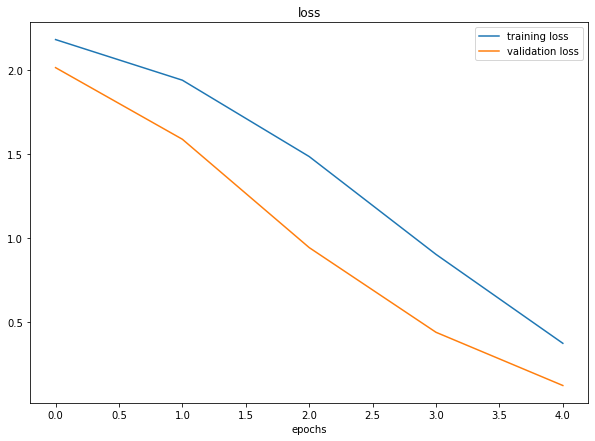

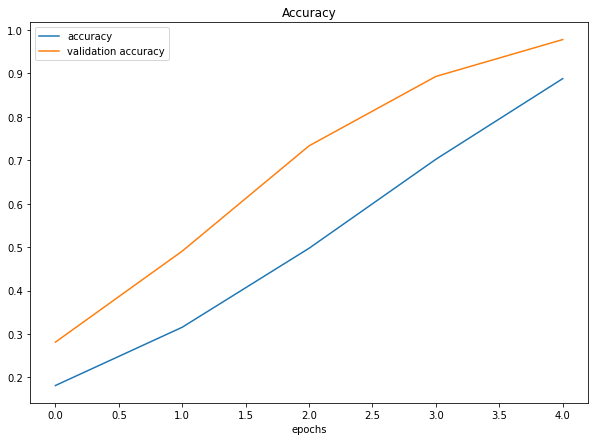

In [ ]:
# I accidentely took train_data in validation data. The accuracy above in the training is wrong. The graph is also wrong
plot_loss_curves(history_1)

## 5. Adjust the model hyperparameter + augment data

What he does in the video is a lot more. I have tested this privately and I skip straight to combine it to one model.

In [ ]:
# First change our datagenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224))
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Try again. Create a model
# Remove 2 conv layers as well
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model_2 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 219ms/step - loss: 2.1082 - accuracy: 0.2444 - val_loss: 2.0153 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 51s 216ms/step - loss: 1.7424 - accuracy: 0.4065 - val_loss: 1.8859 - val_accuracy: 0.3420
Epoch 3/5
235/235 [==============================] - 51s 216ms/step - loss: 1.3179 - accuracy: 0.5740 - val_loss: 2.0563 - val_accuracy: 0.3128
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 0.8135 - accuracy: 0.7541 - val_loss: 2.2948 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 51s 217ms/step - loss: 0.4295 - accuracy: 0.8860 - val_loss: 2.7682 - val_accuracy: 0.3060


In [ ]:
# I want to test a model myself for 100 epochs or something
model_3 = Sequential([
                      Conv2D(32, 5, input_shape=(224, 224, 3), activation='relu'),
                      Conv2D(32, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(24, 3, activation='relu'),
                      Conv2D(16, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(16, 3, activation='relu'),
                      Conv2D(16, 3, activation='relu'),
                      Conv2D(16, 3, activation='relu'),
                      Flatten(),
                      Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 164s 691ms/step - loss: 2.2121 - accuracy: 0.1785 - val_loss: 2.0930 - val_accuracy: 0.2472
Epoch 2/50
235/235 [==============================] - 155s 661ms/step - loss: 2.1375 - accuracy: 0.2228 - val_loss: 2.0509 - val_accuracy: 0.2544
Epoch 3/50
235/235 [==============================] - 153s 651ms/step - loss: 2.0800 - accuracy: 0.2629 - val_loss: 1.9973 - val_accuracy: 0.2976
Epoch 4/50
235/235 [==============================] - 156s 666ms/step - loss: 2.0339 - accuracy: 0.2847 - val_loss: 1.9627 - val_accuracy: 0.3192
Epoch 5/50
235/235 [==============================] - 156s 665ms/step - loss: 2.0064 - accuracy: 0.2921 - val_loss: 1.9678 - val_accuracy: 0.3072
Epoch 6/50
235/235 [==============================] - 164s 699ms/step - loss: 1.9852 - accuracy: 0.2987 - val_loss: 1.9447 - val_accuracy: 0.3212
Epoch 7/50
235/235 [==============================] - 159s 675ms/step - loss: 1.9583 - accuracy: 0.3167 - val_loss: 1.9087 -

In [ ]:
## Saving and loading our model
model_3.evaluate(test_data)

79/79 [==============================] - 40s 503ms/step - loss: 1.3896 - accuracy: 0.5496


[1.389609694480896, 0.5496000051498413]

In [ ]:
# Saving it 
model_3.save('50_epoch_trial')

INFO:tensorflow:Assets written to: 50_epoch_trial/assets


In [ ]:
# Load our model 
loaded_model_3 = tf.keras.models.load_model('50_epoch_trial')
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 39s 495ms/step - loss: 1.4446 - accuracy: 0.5280


[1.4445993900299072, 0.527999997138977]

In [ ]:
# Extra tasks: See the CNN video from MIT.
# Try to go through one of the pages explaining more in detail what a convolution etc is

## 6. Extras I have looked into

In [ ]:
# Was an example in the book I wanted to look at
from sklearn.datasets import load_sample_image
import numpy as np


china = load_sample_image('china.jpg') / 255.
flower = load_sample_image('flower.jpg') / 255.
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
#plt.imshow(images[1])
print(batch_size, height, width, channels)

2 427 640 3


Text(0.5, 1.0, 'Filter 2')

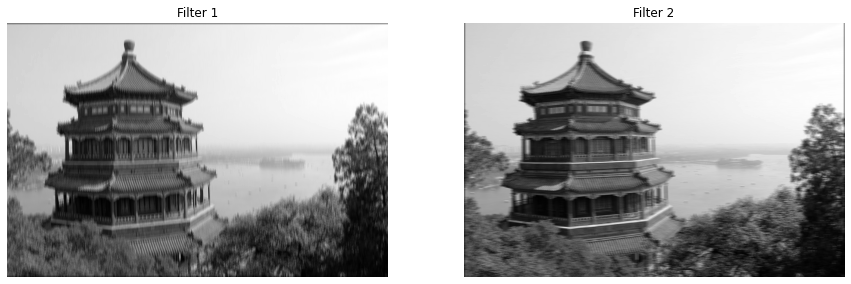

In [ ]:
# Create two filters
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(outputs[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('Filter 1')
plt.subplot(1, 2, 2)
plt.imshow(outputs[0, :, :, 1], cmap='gray')
plt.axis('off')
plt.title('Filter 2')
#plt.show()

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('drive/')

pointcloud = pd.read_csv('/content/drive/MyDrive/TensforFlow_course/Lillehammer181.csv')
pointcloud.head()

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


,# X (mm),Y (mm),Z (mm),Timestamp (s),RANGE (mm),SIGNAL,NEAR_IR,REFLECTIVITY
0,19.691055,21.650494,11.830178,1.631706e+09,31554.0,27.0,23.0,861.0
1,19.819132,21.524488,11.827560,1.631706e+09,31547.0,34.0,29.0,458.0
2,19.957155,21.409260,11.831300,1.631706e+09,31557.0,55.0,49.0,306.0
3,20.065228,21.262121,11.817838,1.631706e+09,31521.0,27.0,24.0,279.0
4,19.712225,20.632994,11.535872,1.631706e+09,30767.0,35.0,31.0,993.0


In [ ]:
import pandas as pd 
pointcloud = pd.read_csv('/content/drive/MyDrive/TensforFlow_course/Lillehammer181.csv')
pointcloud.head()

,# X (mm),Y (mm),Z (mm),Timestamp (s),RANGE (mm),SIGNAL,NEAR_IR,REFLECTIVITY
0,19.691055,21.650494,11.830178,1.631706e+09,31554.0,27.0,23.0,861.0
1,19.819132,21.524488,11.827560,1.631706e+09,31547.0,34.0,29.0,458.0
2,19.957155,21.409260,11.831300,1.631706e+09,31557.0,55.0,49.0,306.0
3,20.065228,21.262121,11.817838,1.631706e+09,31521.0,27.0,24.0,279.0
4,19.712225,20.632994,11.535872,1.631706e+09,30767.0,35.0,31.0,993.0


In [ ]:
pointcloud2 = pd.read_csv('/content/drive/MyDrive/TensforFlow_course/Lillehammer187.csv')
pointcloud2.head()

,# X (mm),Y (mm),Z (mm),Timestamp (s),RANGE (mm),SIGNAL,NEAR_IR,REFLECTIVITY
0,13.044168,24.303047,11.151442,1.631706e+09,29739.0,22.0,22.0,381.0
1,12.640261,23.207745,10.685489,1.631706e+09,28493.0,32.0,33.0,1073.0
2,12.609250,22.816425,10.541141,1.631706e+09,28107.0,26.0,28.0,1082.0
3,12.384793,21.774822,10.130533,1.631706e+09,27009.0,25.0,30.0,1096.0
4,12.369848,21.441357,10.010866,1.631706e+09,26689.0,23.0,27.0,1130.0


In [ ]:
pointcloud = np.array(pointcloud)
pointcloud_xyz = pointcloud[:, :3] 
pointcloud_xyz.shape

(66160, 3)

In [ ]:
pointcloud2 = np.array(pointcloud2)
pointcloud_xyz2 = pointcloud2[:66160, :3] 
pointcloud_xyz2.shape

(66160, 3)

In [ ]:
pointclouds = np.array([pointcloud_xyz, pointcloud_xyz2])
pointclouds.shape

(2, 66160, 3)

In [ ]:
m_size = pointcloud_xyz.max()

pointcloud_xyz = pointcloud_xyz / m_size
pointcloud_xyz.max()

1.0

In [ ]:
import numpy as np
import tensorflow as tf

print(tf.rank(pointclouds))

tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
p_filter = np.zeros(shape=(7, 2, 2), dtype=np.float32)
p_filter[2, :, :] = 1

test_output = tf.nn.conv1d(pointclouds, p_filter, stride=1, padding='SAME')


InvalidArgumentError: ignored

In [ ]:
# Let the error stay there. It just reminds me that pointclouds are different and the inbuilt libraries are for different shape stuff. This can be filled I guess with 1s etc. Maybe I can try it

In [ ]:
pointcloud_xyz = tf.expand_dims(pointcloud_xyz, axis=0)
pointclouds2 = tf.expand_dims(pointclouds, axis=0)
print(tf.rank(pointcloud_xyz))
print(tf.rank(pointclouds2))
print(type(pointcloud_xyz[0, 0]))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
pointcloud_tensor = tf.constant(pointcloud_xyz)

In [ ]:
print(pointcloud_tensor[0, 0, 0])

tf.Tensor(0.40092056767874173, shape=(), dtype=float64)


In [ ]:
p2_filter = np.zeros(shape=(1, 3, 3), dtype=np.float64)
p2_filter[:, 0, :] = 1
print(p2_filter.shape)
print(pointcloud_tensor.shape)

(1, 3, 3)
(1, 66160, 3)


In [ ]:
test_x = tf.nn.conv1d(pointcloud_tensor, p2_filter, stride=1, padding='SAME')

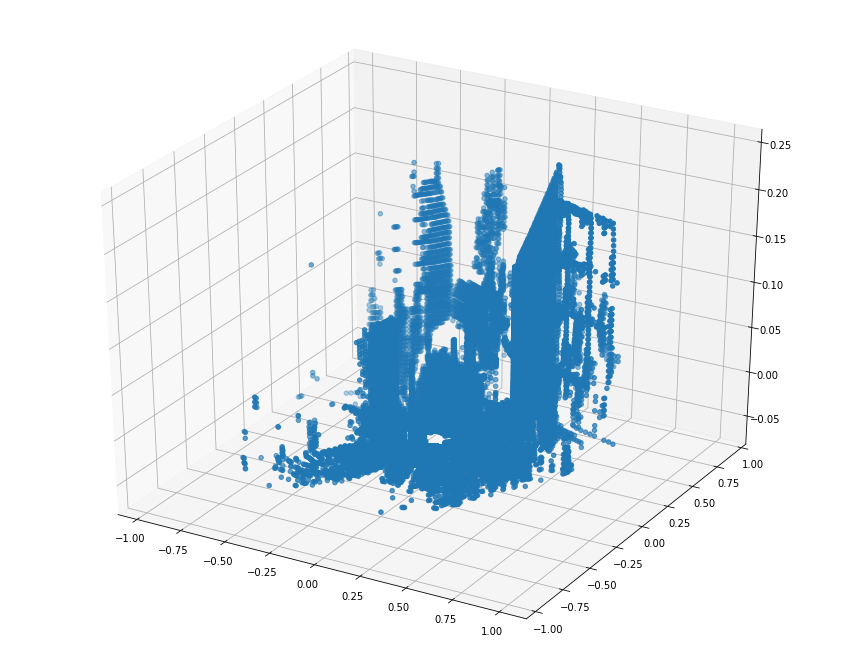

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(projection='3d')
#x, y, z = pointcloud_tensor[0, :]
ax.scatter(pointcloud_tensor[0, :, 0], pointcloud_tensor[0, :, 1], pointcloud_tensor[0, :, 2])

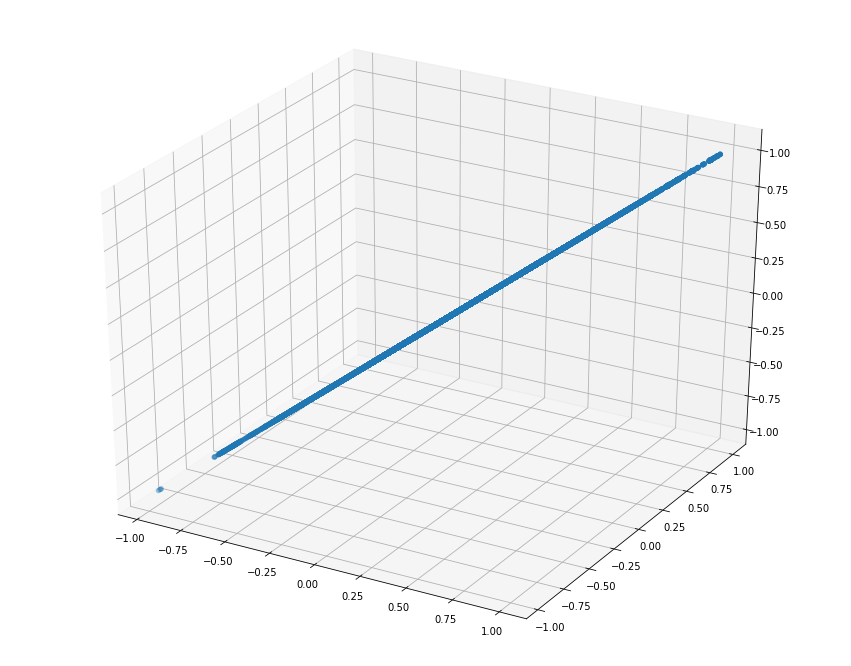

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(test_x[0, :, 0], test_x[0, :, 1], test_x[0, :, 2])


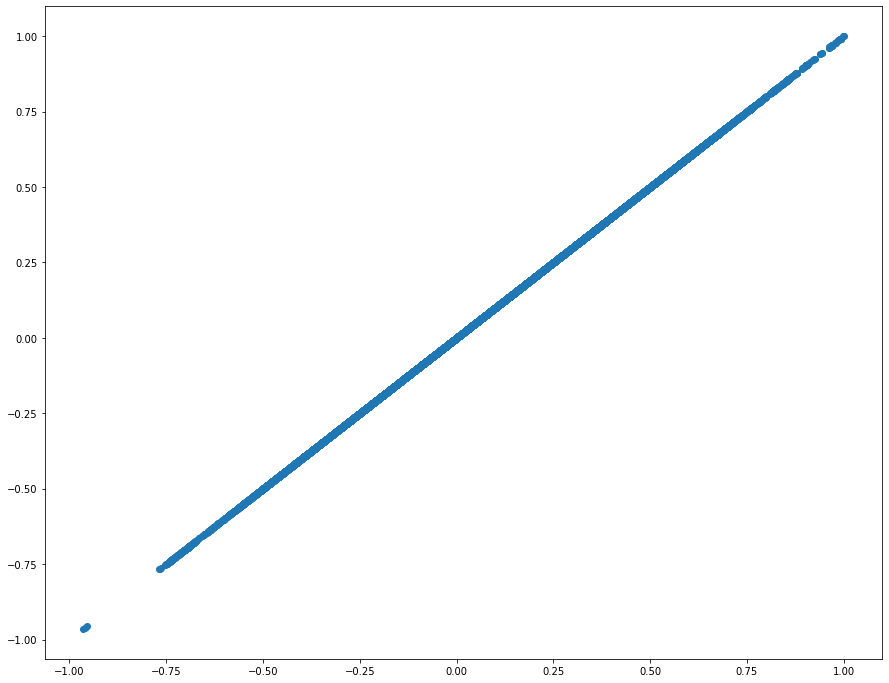

In [ ]:
plt.figure(figsize=(15, 12))
plt.scatter(test_x[0, :, 0], test_x[0, :, 2])

In [ ]:
test_x[0, :]

<tf.Tensor: shape=(66160, 3), dtype=float64, numpy=
array([[ 0.40092057,  0.40092057,  0.40092057],
       [ 0.40352828,  0.40352828,  0.40352828],
       [ 0.40633851,  0.40633851,  0.40633851],
       ...,
       [-0.07398041, -0.07398041, -0.07398041],
       [-0.07446884, -0.07446884, -0.07446884],
       [-0.0748759 , -0.0748759 , -0.0748759 ]])>

In [ ]:
pointcloud = pd.read_csv('/content/drive/MyDrive/TensforFlow_course/Lillehammer181.csv')
pointcloud2 = pd.read_csv('/content/drive/MyDrive/TensforFlow_course/Lillehammer187.csv')
pointcloud_tensor = np.array(pointcloud)[:, :3]
pointcloud_tensor2 = np.array(pointcloud2)[:66160, :3]
pointcloud_tensor2.shape

(66160, 3)

In [ ]:
pointclouds = np.array([pointcloud_tensor, pointcloud_tensor2])
pointclouds.shape

(2, 66160, 3)

In [ ]:
t_filter = np.zeros(shape=(3, 1, 3), dtype=np.float64)
t_filter[:, :, 1] = 1
t_filter[:, :, 2] = 1
output = tf.nn.conv1d(pointclouds, t_filter, stride=1, padding='SAME')
output.shape

TensorShape([2, 66160, 3])

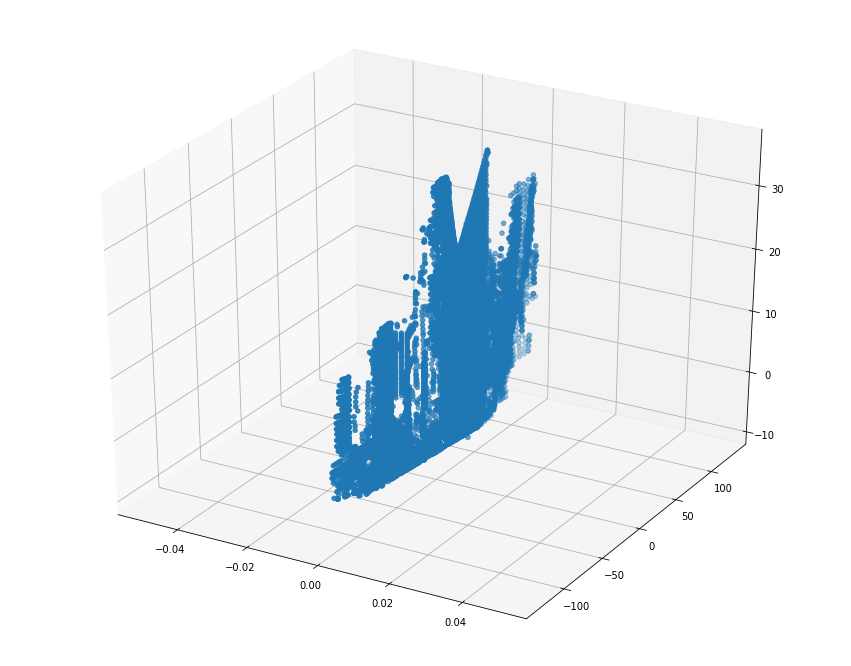

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(output[0, :, 0], output[0, :, 1], output[0, :, 2])

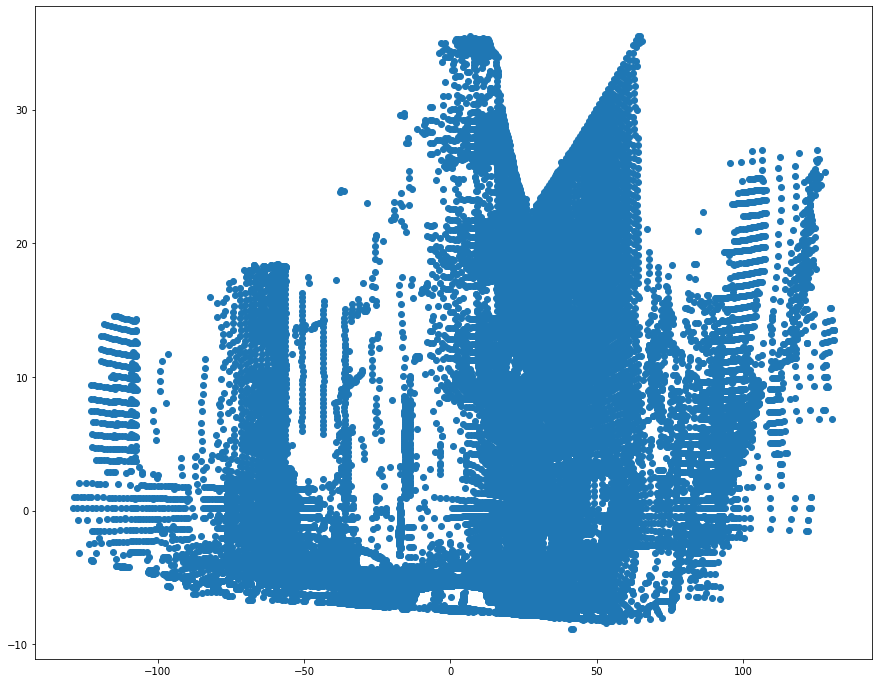

In [ ]:
plt.figure(figsize=(15, 12))
plt.scatter(output[0, :, 1], output[0, :, 2])